Step 1: Load the Dataset

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/llhthinker/MachineLearningLab/master/UCI%20Bank%20Marketing%20Data%20Set/data/bank-additional/bank-additional-full.csv"
df = pd.read_csv(url, sep=';')
print("Loaded rows:", df.shape[0], "columns:", df.shape[1])

Loaded rows: 41188 columns: 21


Step 2: Preprocessing

In [ ]:
# Convert target to binary
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Drop 'duration' (leak feature known only post-call)
df = df.drop(columns=['duration'])

# One-hot encode categorical features
df = pd.get_dummies(df, drop_first=True)

# Split into features and target
X = df.drop('y', axis=1)
y = df['y']

In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Step 3: Train the Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Step 4: Evaluation with Confusion Matrix

Confusion Matrix:
 [[7190  113]
 [ 737  198]]


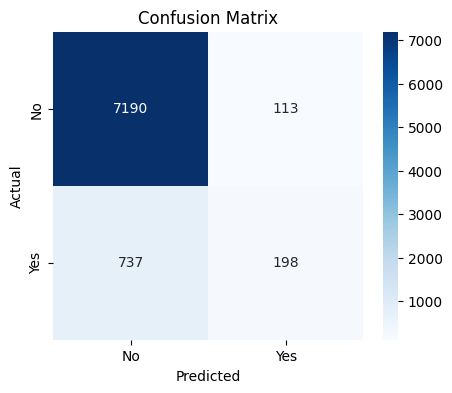

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize it
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Accuracy and detailed metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['No','Yes']))

Accuracy: 0.8968196164117505

Classification Report:
               precision    recall  f1-score   support

          No       0.91      0.98      0.94      7303
         Yes       0.64      0.21      0.32       935

    accuracy                           0.90      8238
   macro avg       0.77      0.60      0.63      8238
weighted avg       0.88      0.90      0.87      8238



Step 5: Test Result Visualization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Count of actual vs predicted values
actual_counts = y_test.value_counts().sort_index()
pred_counts = pd.Series(y_pred).value_counts().sort_index()

# Plotting
x_labels = ['No', 'Yes']
x = np.arange(len(x_labels))

fig, ax = plt.subplots(figsize=(6,4))
bar1 = ax.bar(x - 0.2, actual_counts, 0.4, label='Actual')
bar2 = ax.bar(x + 0.2, pred_counts, 0.4, label='Predicted')

ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Actual vs Predicted Class Distribution')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()

# Annotate bar values
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()
